 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:7890/notebooks/cv/vqa/vqa.ipynb#Download-Data" data-toc-modified-id="Download-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Download Data</a></span></li><li><span><a href="http://localhost:7890/notebooks/cv/vqa/vqa.ipynb#VQATools-Demo" data-toc-modified-id="VQATools-Demo-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>VQATools Demo</a></span></li><li><span><a href="http://localhost:7890/notebooks/cv/vqa/vqa.ipynb#Demo-Model" data-toc-modified-id="Demo-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Demo Model</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os

import sys

sys.path.append('VQA/PythonHelperTools/vqaTools/') # clone this in Download Data before trying to import
from vqa import VQA

sys.path.append('../scripts')
from utils import tf_init

config = tf_init()

%matplotlib inline

In [2]:
annotations_path = 'data/v2_mscoco_train2014_annotations.json'
questions_path = 'data/v2_OpenEnded_mscoco_train2014_questions.json'
img_dir = 'data/train2014/'

vqa=VQA(annotations_path, questions_path) # initialize VQA api for QA annotations

loading VQA annotations and questions into memory...
0:00:16.785676
creating index...
index created!


# Download Data
Download links for the VQA dataset are from [here][links]. The GloVe vectors are from [here][glove]; these ones are trained on Wikipedia; they also have a couple of other sets available for download (these are the ones with the smallest vocabulary).

[links]: http://visualqa.org/download.html
[glove]: https://github.com/stanfordnlp/GloVe

In [5]:
%%bash

# get the vqa helper tools to assist with loading the data
git clone https://github.com/VT-vision-lab/VQA.git

mkdir -p data
cd data

# word embeddings
wget -qO glove.zip http://nlp.stanford.edu/data/wordvecs/glove.6B.zip

# vqa dataset
wget -qO train_answers.zip http://visualqa.org/data/mscoco/vqa/v2_Annotations_Train_mscoco.zip
wget -qO train_questions.zip http://visualqa.org/data/mscoco/vqa/v2_Questions_Train_mscoco.zip
# getting the images will take some time
wget -qO train_images.zip http://msvocds.blob.core.windows.net/coco2014/train2014.zip

unzip "*.zip"
rm *.zip

Cloning into 'VQA'...


# VQATools Demo

Question: How many containers are in the photo?
Answer 1: 6
Answer 2: 6
Answer 3: 6
Answer 4: 6
Answer 5: 06
Answer 6: 6
Answer 7: 6
Answer 8: 6
Answer 9: 6
Answer 10: 6


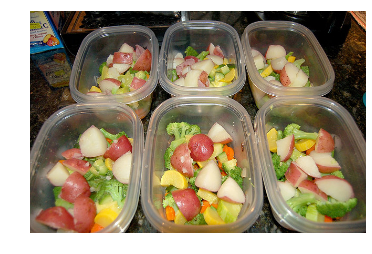

In [33]:
# load and display QA annotations for given question types
annIds = vqa.getQuesIds(quesTypes='how many')
anns = vqa.loadQA(annIds)
randomAnn = np.random.choice(anns)
vqa.showQA([randomAnn])
imgId = randomAnn['image_id']
imgFilename = 'COCO_' + dataSubType + '_'+ str(imgId).zfill(12) + '.jpg'

if os.path.isfile(img_dir + imgFilename):
    I = plt.imread(img_dir + imgFilename)
    plt.imshow(I)
    plt.axis('off')
    plt.show()

Question: Do you think the couple could have found a warmer place to get a picture taken?
Answer 1: yes
Answer 2: yes
Answer 3: yes
Answer 4: yes
Answer 5: yes
Answer 6: yes
Answer 7: yes
Answer 8: yes
Answer 9: yes
Answer 10: yes


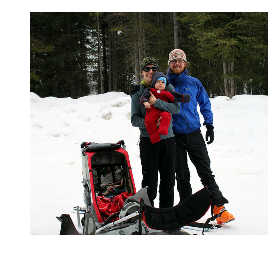

In [26]:
# load and display QA annotations for given answer types
# ansTypes can be one of the following: yes/no, number, other

annIds = vqa.getQuesIds(ansTypes='yes/no')
anns = vqa.loadQA(annIds)
randomAnn = np.random.choice(anns)
vqa.showQA([randomAnn])
imgId = randomAnn['image_id']
imgFilename = 'COCO_' + dataSubType + '_'+ str(imgId).zfill(12) + '.jpg'
if os.path.isfile(img_dir + imgFilename):
    I = plt.imread(img_dir + imgFilename)
    plt.imshow(I)
    plt.axis('off')
    plt.show()

Question: What is the route that this bus is running?
Answer 1: unsure
Answer 2: first route
Answer 3: downtown chicago
Answer 4: straight
Answer 5: city
Answer 6: bus route
Answer 7: london route
Answer 8: hop off
Answer 9: unknown
Answer 10: downtown


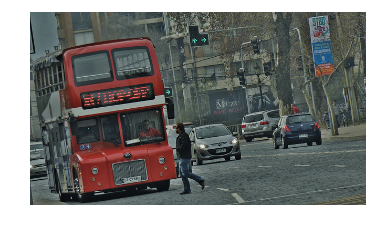

In [38]:
# load and display QA annotations for given images
"""
Usage: vqa.getImgIds(quesIds=[], quesTypes=[], ansTypes=[])
Above method can be used to retrieve imageIds for given question Ids or given question types or given answer types.
"""

ids = vqa.getImgIds()
annIds = vqa.getQuesIds(imgIds=random.sample(ids,5));  
anns = vqa.loadQA(annIds)
randomAnn = np.random.choice(anns)
vqa.showQA([randomAnn])  
imgId = randomAnn['image_id']
imgFilename = 'COCO_' + dataSubType + '_'+ str(imgId).zfill(12) + '.jpg'
if os.path.isfile(img_dir + imgFilename):
    I = plt.imread(img_dir + imgFilename)
    plt.imshow(I)
    plt.axis('off')
    plt.show()

In [3]:
q = vqa.getQuesIds()

In [11]:
next(iter(vqa.qqa.keys()))

196608000

In [15]:
v = vqa.qqa.values()

In [16]:
v[0]

[{u'image_id': 196608,
  u'question': u'What is the person touching?',
  u'question_id': 196608000},
 {u'image_id': 265814,
  u'question': u'Is that a car?',
  u'question_id': 265814017},
 {u'image_id': 196608,
  u'question': u'What is on either side of the computer?',
  u'question_id': 196608002},
 {u'image_id': 196608,
  u'question': u'Is the laptop on?',
  u'question_id': 196608003},
 {u'image_id': 420479,
  u'question': u'Where would somebody walk?',
  u'question_id': 420479000},
 {u'image_id': 420479,
  u'question': u'Is this a harbor?',
  u'question_id': 420479001},
 {u'image_id': 420479,
  u'question': u'Are the boats sailing?',
  u'question_id': 420479002},
 {u'image_id': 158335,
  u'question': u'Are the donuts fresh?',
  u'question_id': 158335003},
 {u'image_id': 158335,
  u'question': u'How many sprinkles are on this donut?',
  u'question_id': 158335004},
 {u'image_id': 122527,
  u'question': u"What superhero is on the boy's hat?",
  u'question_id': 122527000},
 {u'image_id':

# Demo Model
**Loading**
* How to efficiently load the images during training for TF?

**Preprocessing**
* Convert images to float32 instead of uint8
* Try to do some dynamic pooling (e.g SPP or...) so that we don't have to resize
    * Does `tf.nn.fractional_.._pool` help at all?
* Add random left-right flips
* Add random crops? Hard to say if you get rid of something important...
* Embed the words of the question using, e.g., Glove

**Pre-trained Models**
* Consider finding some RNN trained to do question answering already?
* Consider other word vectors?

**Models**
* Compare concatenating the image and question embeddings vs multiplying them

**Training**
* Finetune the CNN or no?

In [72]:
punctuation = '!@#$%^&*()_+=-{}[]:"\';<>?/.,~'
def preprocess_question(question):
    for p in punctuation:
        question = question.replace(p, '')
    return question.lower()

In [75]:
batch_size = 128
embedding_size = 300
img_size = (500, 500)
n_lstm_units = 512

# csv.QUOTE_NONE = 3; this makes it so things like " are parsed as words instead of as the start of a string
embeddings = pd.read_csv('data/glove.6B.{}d.txt'.format(embedding_size), sep=' ', index_col=0, header=None, quoting=3)
padding = '@PADDING@'
embeddings = pd.concat([embeddings, pd.DataFrame([[0] * embedding_size], index=[padding], columns=embeddings.columns)])

question_ids = vqa.getQuesIds()
questions = [preprocess_question(vqa.qqa[question_id]['question']).split(' ') for question_id in question_ids]

# pad all questions to same length
max_question_length = max(len(question) for question in questions)
questions = np.array([question + [padding] * (max_question_length - len(question)) for question in questions])

In [76]:
tf.reset_default_graph()

In [77]:
images = tf.placeholder(tf.float32, shape=(None, None, None, 3), name='raw_images') # batch x height x width x channels
images = tf.image.resize_images(images, size=img_size)

cnn = tf.contrib.keras.applications.ResNet50(include_top=False, input_tensor=images)
img_embedding = tf.reshape(cnn.output, shape=(-1, np.product(cnn.output.shape.as_list()[1:])))
img_embedding

<tf.Tensor 'Reshape:0' shape=(?, 8192) dtype=float32>

In [78]:
questions_p = tf.placeholder(tf.float32, shape=(None, max_question_length, embedding_size), name='embedded_questions')

rnn_cells = tf.contrib.rnn.LSTMCell(n_lstm_units)
outputs, state = tf.nn.dynamic_rnn(rnn_cells, questions_p, dtype=tf.float32, parallel_iterations=batch_size)

# TODO: fix this to actually get the last relevant output; use state too or only output?
last_output = outputs[:, -1, :]
last_output

<tf.Tensor 'strided_slice:0' shape=(?, 512) dtype=float32>

In [80]:
img_and_question = tf.concat([img_embedding, last_output], axis=1)
img_and_question

<tf.Tensor 'concat_1:0' shape=(?, 8704) dtype=float32>

In [81]:
n_classes = 1000
hidden = tf.layers.dense(img_and_question, 1024, activation=tf.nn.relu)
output = tf.layers.dense(hidden, n_classes)

In [ ]:
batch_questions = questions[:batch_size]
embedded_questions = embeddings.loc[batch_questions.ravel()].values.reshape(-1, max_question_length, embedding_size)